<a href="https://colab.research.google.com/github/abulzunayed/Machine-Learning_Course_Udemy-A-Z-with-Python_2023-/blob/main/Regression_code/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Importing the dataset

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ML AtoZ/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
x= df.iloc[:, :-1].values
y= df.iloc[:, -1].values
x.shape

(50, 4)

In [ ]:
y.shape

(50,)

Encoding categorical data:

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x= np.array(ct.fit_transform(x))
x


array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

Split the train and test data set:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

Training the Multiple Linear Regression on training set:

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_train.shape

(40, 6)

In [ ]:
y_train.shape

(40,)

Predict the Test set result:

In [ ]:
y_pred= regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate( ( y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1))


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


Visualising the training set results. But not possible , because X and y are not same size.

ValueError: ignored

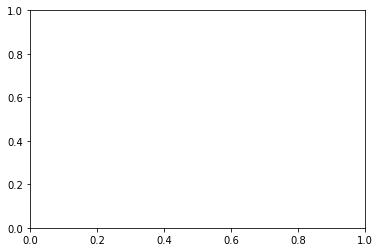

In [ ]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('salary vs expense(Traing set)')
plt.xlabel('year Expense')
plt.ylabel('salary')
plt.show()

Evaluating the Model Performance:

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9347068473282515